# Predict Stocks Prices

Our goal here is to take the continious data, find the equation that best fits the data and be able to forecast out the specific value. We are considering the fluidity of price over time, and attempting to forecast the next fluid price in the future using continious dataset. We are using the website Quandl for the dataset. 

## Import dependencies

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import quandl
import math
import datetime
import pickle

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading data

In [2]:
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


## Exploring data

In [3]:
df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0  
        # High - Low Percent Volatility = (high - low) / low * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0  
        # Daily Percent Change = (new - old) / old * 100.0 

#### Creating some new valuable features / data through manipulation

In [4]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [5]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # missing data will be considered as an outlier

forecast_out = int(math.ceil(0.01*len(df))) 
print(forecast_out)

35


In [6]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

X = np.array(df.drop(['label'], 1)) #features
X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]


df.dropna(inplace=True) # removing rows and columns with null/NaN values
y = np.array(df['label'])

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [7]:
print( len(X), len(y) ) # just for cross-checking

3389 3389


## Initializing, Training and Testing the model

### with LinearRegression algorithm

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression(n_jobs = 1)

In [9]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9778359676900645


### with SVR

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = svm.SVR()

In [12]:
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7968348637369072


### with SVR polynomial kernel

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = svm.SVR(kernel = 'poly')

In [15]:
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6116541077320784


## Regression Forecasting and Predicting

In [17]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1076.63622399 1122.12088387 1235.28084361 1191.47152756 1159.65886188
 1156.37078906 1181.23342612 1169.76115706 1123.43258687 1106.7007427
 1108.08822783 1224.27788241 1258.03694247 1225.95919304 1308.21391092
 1319.82133855 1312.24933179 1327.05444614 1329.1442638  1445.61679722
 1321.34775852 1451.59461815 1406.3963004  1468.68524173 1578.72191385
 1572.4337641  1507.06714569 1611.9884483  1638.39990146 1562.74799552
 1515.11525078 1592.85210346 1523.72723652 1139.18576868 1439.42341781] 0.6116541077320784 35


In [18]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400   # total seconds in a day
next_unix = last_unix + one_day


for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238       NaN
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414       NaN
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727       NaN
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146       NaN
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849       NaN
                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-03-08 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 05:30:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 05:30:00         NaN     NaN         NaN          NaN    NaN 

## Data Visualization

<IPython.core.display.Javascript object>


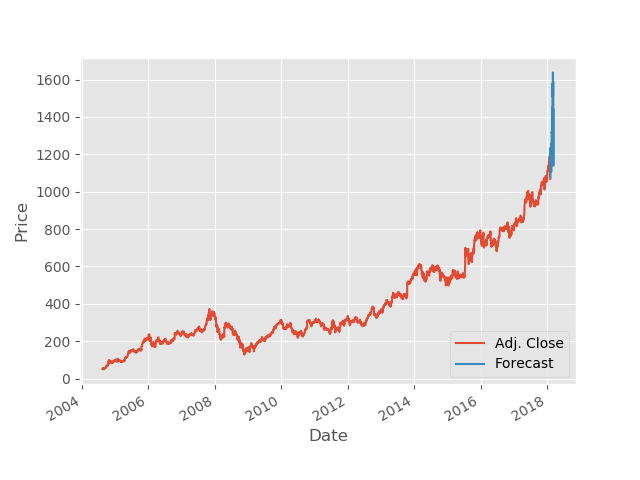

In [20]:
df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()